In [88]:
# Base
from typing import List, Tuple, Optional

# Data
import time
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import tkinter  as tk 
from tkcalendar import DateEntry

# CLI
#from fire import Fire

coins = ["bitcoin", "ethereum"]
MULTIPLIERS = {
    "daily": 365,
    "hourly": 365 * 24,
    "minutely": 365 * 24 * 60,
}

def get_unix_from_today(days_from_today: int) -> int:
    current_unix = int(round(time.time()))
    return current_unix - (days_from_today * 24 * 60 * 60), current_unix

def get_coin_description(
    ### Chen Zhu ###
    coin: str
) -> str:
    """
    Take in the coin name (e.g. 'bitcoin', 'ethereum')
    and return 2 sentences of description for the coin

    Param:
    - coin (str): The token name
    Output:
    - description (str): The description from CoinGecko

    Reference: https://www.coingecko.com/en/api/documentation at GET /coins/{id}
    """
    api_url = "https://api.coingecko.com/api/v3/"
    endpoint = f"coins/{coin}/"

    response = requests.get(api_url + endpoint)
    description = response.json()["description"]["en"].split(". ")[:2]
    return ". ".join(description) + "."


def get_price(
    coin: str,
    start_unix: Optional[int] = None,
    end_unix: Optional[int] = None,
    vs_currency: Optional[str] = "sgd",
) -> List[List]:
    """
    Take in the coin name, start_unix, end_unix, and comparison currency
    and return the prices.

    If either start_unix & end_unix are not provided,
    then default to past 2 days (48 hours).

    Params:
    - coin (str) e.g. "bitcoin", "ethereum", "dogecoin"
    - start_unix (int)
    - end_unix (int)
    - vs_currency: either "usd" or "sgd"

    TODO: Update "days_from_today" into "start_date" and "end_date"
    """
    if (not start_unix) or (not end_unix):
        start_unix, end_unix = get_unix_from_today(2)

    api_url = "https://api.coingecko.com/api/v3/"
    endpoint = f"coins/{coin}/market_chart/range/"

    params = {
        "vs_currency": vs_currency,
        "from": start_unix,
        "to": end_unix,
    }

    response = requests.get(api_url + endpoint, params=params)
    
    # Exception handling for invalid coin names
    try:
        response.json()["prices"]
    except KeyError:
        manualinput.delete(0, 'end')
        messagebox.showerror('Error', 
                             'You have entered an invalid coin name. Please ensure your coin input is valid.')
    
    
    return response.json()["prices"]


def convert_date_to_unix(date_str: str) -> int:
    ### Loc Nguyen ###
    """
    Take in a date in format YYYY-MM-DD
    and return the UNIX time

    Params:
    - date_str (str)
    Outputs:
    - date_unix (int)
    """
    return int(datetime.strptime(date_str, '%Y-%m-%d').timestamp())


def convert_dates_to_unix(start_date: str, end_date: str) -> Tuple[int, int]:
    """
    Take in start_date and end_date (in YYYY-MM-DD)
    and return the UNIX times

    (assumes the user is based in Singapore)

    Params:
    - start_date (str)
    - end_date (str)
    Outputs:
    - start_unix (int)
    - end_unix (int)

    Reference: https://www.epochconverter.com/
    """
    start_unix = convert_date_to_unix(start_date)
    end_unix = convert_date_to_unix(end_date)
    return start_unix, end_unix


def addentry(value):
    if value == "Other":
        manualinput.grid(row=3, column = 2, padx = 5)
        
def get_user_input_for_chart() -> Tuple[str, str, str]:
    ### Li ZhuangJing ###
    """
    Function to print out messages
    to take in user requests for charting
    and return the requests if valid

    Params: None
    Outputs:
    - coin (str)
    - start_date (str)
    - end_date (str)
    """
    msg = "TODO"
    coin_msg = ttk.Label(input_frame, text="Please choose one coin : ", font=('Arial',12), 
                         style='I.TLabel', width= 85)
    coin_msg.grid(row=3, column=0, sticky='w', padx=5, pady=2)

#     coin = ttk.Entry(input_frame)
    coinlist = ["Bitcoin", "Ethereum", "Tether", "Dogecoin", "Cardano", "Solana", "Polkadot", "TRON", "Uniswap","Litecoin", "Other"]
    coinvar = tk.StringVar(input_frame, 'None')
    coin = tk.OptionMenu(input_frame, coinvar, *coinlist, command=addentry)
    coinvar.set('Bitcoin')
    coin.grid(row=3, column=1, padx=50, pady=2)

    # TODO: Fill out
    start_date_msg = ttk.Label(input_frame, 
                               text="Please choose or enter a start date for the coin selected (dd/mm/yyyy format, eg. 31/12/2021): ", 
                               font=('Arial',12), style='I.TLabel')
    start_date_msg.grid(row=4, column=0, sticky='w', padx=5, pady=2)
    
#     start_date = ttk.Entry(input_frame)
    start_date = DateEntry(input_frame, selectmode='day')
    start_date.grid(row=4, column=1, padx=5, pady=2)

    end_date_msg = ttk.Label(input_frame, 
                             text="Please choose or enter an end date for the coin selected (dd/mm/yyyy format, eg. 31/12/2021): ", 
                             font=('Arial',12), style='I.TLabel')
    end_date_msg.grid(row=5, column=0, sticky='w', padx=5, pady=2)
    
#     end_date = ttk.Entry(input_frame)
    end_date = DateEntry(input_frame, selectmode='day')
    end_date.grid(row=5, column=1, padx=5, pady=2)

    return coinvar, start_date, end_date  # Tuple


def get_user_input_for_retirement(coin:str, start_date:str, end_date:str) -> float:
    ### Li ZhuangJing ###
    """
    Function to print out messages
    to take in user requests for retirement planning
    and return the requests if valid

    Param: None
    Output:
    - retirement_goal (float) e.g. 150,000.00 or 1,000,000.05
    """
    # Create new window for wealth management
    wealth_window = tk.Toplevel(main_window)
    wealth_window.title('Wealth Planner')
    wealth_window.geometry('560x310')
    
    wealth_input_frame = ttk.LabelFrame(wealth_window, text='User Inputs', style='I.TLabelframe')
    wealth_input_frame.pack(fill='x', expand=True, side='top', padx = 5, pady = 5)
    
    wealth_output_frame = ttk.LabelFrame(wealth_window, text='Results', style='O.TLabelframe')
    wealth_output_frame.pack(fill='x', expand=True, padx = 5, pady = 5)
    
    wealth_exit_frame  = ttk.LabelFrame(wealth_window, text='Exit', style='Q.TLabelframe')
    wealth_exit_frame.pack(fill='x', side='bottom', padx = 5, pady = 5)
    
    # Starting asset (i.e. net worth) 
    start_msg = ttk.Label(wealth_input_frame, text="Please enter your current net worth: ", font=('Arial',12), style='I.TLabel')
    start_msg.grid(row=0, column=0, pady=2, sticky='w')
    
    starting_asset = ttk.Entry(wealth_input_frame)
    starting_asset.grid(row=0, column=1, pady=2)

    # Retirement goal
    goal_msg = ttk.Label(wealth_input_frame, text="Please enter the retirement monetary goal you want to achieve: ", 
                         font=('Arial',12), style='I.TLabel')
    goal_msg.grid(row=1, column=0, pady=2, sticky='w')
    
    retirement_goal = ttk.Entry(wealth_input_frame)
    retirement_goal.grid(row=1, column=1, pady=2)
        
    # Placeholder for text explaining how long it takes to attain wealth goal
    wealth_attainment_time = ttk.Label(wealth_output_frame, text='', font=('Arial',12), wraplength=350, style='O.TLabel')
    wealth_attainment_time.grid(row=5, column=0, sticky='w', pady=2)
    
    # Submit user's inputs
    submit_wealth_button = ttk.Button(wealth_input_frame, 
                                      text='Submit', command=lambda: show_retirement_goal(coin, 
                                                                                          start_date, 
                                                                                          end_date,
                                                                                          float(starting_asset.get()),
                                                                                          float(retirement_goal.get()),
                                                                                           wealth_attainment_time), 
                                     style='W.TButton')
    submit_wealth_button.grid(row=3, column=1, sticky='n')
    
    # Exit button
    exit_program_button = ttk.Button(wealth_exit_frame, text='Exit Program', command=wealth_window.destroy, style='N.TButton')
    exit_program_button.grid(row=7, column=4, sticky='e', padx=230, pady=2)
    
    wealth_window.mainloop()
    
    # Return
    return coin, start_date, end_date, starting_asset, retirement_goal, wealth_attainment_time


def calculate_annualized_returns(prices: List[float], granularity: str = "daily") -> float:
    ### Chen Zhu ###
    """
    Take in the list of prices (default to daily granularity)
    and return the annualized returns

    by:
    - calculating the returns from prices (end price - start price)
    - annualizing the average returns according to granularity

    Params:
    - prices (list of floats)
    - granularity (str): can be "daily", "hourly", "minutely" - defaults to daily
    Output:
    - returns (float): the annualized returns (e.g. 0.2345 or 23.45%)
    """
    assert len(prices) > 1, "Error: Not enough prices to calculate returns (at least 2 prices)!"

    # Annualize according to MULTIPLIERS
    mult = MULTIPLIERS.get(granularity)
    if mult:
        returns = prices[-1] / prices[0]
        invested_for = len(prices) - 1
        annual_returns = returns ** (mult / invested_for) - 1
        return annual_returns
    raise ValueError(
        "Unsupported granularity. Has to be one of: daily, hourly, minutely"
    )


def calculate_high(prices: List[float]) -> float:
    ### Samuel ###
    """
    Take in the list of prices (default to daily granularity)
    and return the high.

    Params:
    - prices (list of floats)
    Output:
    - the high
    """
    try:
        if float(min(prices)) < 0:
            messagebox.showerror('Error!', 'There are negative prices.')
        else:
            return float(max(prices))
    except ValueError:
        messagebox.showerror('Error!', 'This is an empty list.')


def calculate_low(prices: List[float]) -> float:
    ### Samuel ###
    """
    Take in the list of prices (default to daily granularity)
    and return the low.

    Params:
    - prices (list of floats)
    Output:
    - the low
    """
    try:
        if float(min(prices)) < 0:
            messagebox.showerror('Error!', 'There are negative prices.')
        else:
            return float(min(prices))
    except ValueError:
        messagebox.showerror('Error!', 'This is an empty list.')


def calculate_years_to_retire(
    starting_asset: float,
    retirement_goal: float,
    prices: List[float],
    granularity: str = "daily",
) -> float:
    ### Li ZhuangJing ###
    """
    Calculate the number of years to retire
    assuming that returns are constant
    and calculated from the list of prices (as close price / open price, annualized)

    Args:
    - starting_asset (float) e.g. 150,000 USD or 300,000 SGD
    - retirement_goal (float) e.g. 150,000 USD or 300,000 SGD
    - prices: and the list of prices (e.g. [1,2,3,4])
    (and optionally, the granularity of the prices data)

    Outputs:
    - years_to_retire (float) e.g. 10.5
    """
    # Prep & test
    annual_returns = calculate_annualized_returns(prices, granularity)
    target_returns = retirement_goal / starting_asset
    if target_returns <= 1:
        return 0 # Already there!
    
    # Calc
    years_to_retire = target_returns ** (1 / annual_returns) - 1
    if annual_returns <= 0:
        messagebox.showwarning('Warning', 'The annual returns is non-positive. You will never retire!')
    return years_to_retire


def calculate_annualized_volatility(
    prices: List[float], granularity: str = "daily"
) -> float:
    ### Louis
    """
    Take in the list of prices (default to daily granularity)
    and return the volatility.

    Params:
    - prices (list of floats)
    Output:
    - volatility
    """
    # Convert CoinGecko's price output into a Pandas Dataframe
    price_df = pd.DataFrame(prices, columns=["Price"])

    # Calculate historical annualised volatility
    # by taking the log-return of daily price movements,
    # calculating it's variance,
    # then multiply it by 365,
    # then take it's square root to get the standard deviation
    log_ret = np.log(price_df["Price"] / price_df["Price"].shift())
    var = np.var(log_ret)

    # Annualize
    mult = MULTIPLIERS.get(granularity)
    if mult:
        volatility = np.sqrt(var * mult)
        return volatility

    raise ValueError(
        "Unsupported granularity. Has to be one of: daily, hourly, minutely"
    )


#if __name__ == "__main__":
    #Fire()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/samuellau/miniforge3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/6w/6zbtf9jx6d9404gn8qy5j3fh0000gn/T/ipykernel_13574/513341788.py", line 100, in <lambda>
    command=lambda: show_chart(coin,
  File "/var/folders/6w/6zbtf9jx6d9404gn8qy5j3fh0000gn/T/ipykernel_13574/513341788.py", line 166, in show_chart
    metrics = calc_metrics(prices)
  File "/var/folders/6w/6zbtf9jx6d9404gn8qy5j3fh0000gn/T/ipykernel_13574/513341788.py", line 85, in calc_metrics
    "Price - Open": prices[0],
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/samuellau/miniforge3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/6w/6zbtf9jx6d9404gn8qy5j3fh0000gn/T/ipykernel_13574/513341788.py", line 100, in <lambda>
    command=lambda: show_chart(coin,
 

<Figure size 900x200 with 0 Axes>

<Figure size 900x200 with 0 Axes>

<Figure size 900x200 with 0 Axes>

<Figure size 900x200 with 0 Axes>

<Figure size 900x200 with 0 Axes>

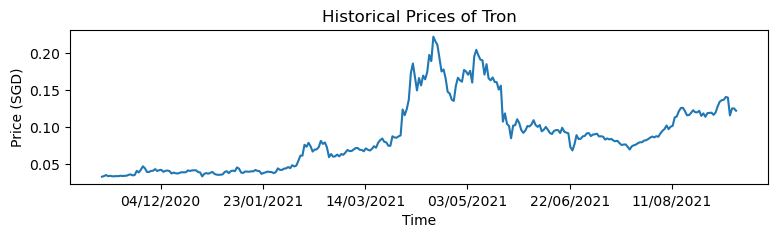

In [89]:
# Base
from typing import Dict, List

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# GUI
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from ttkthemes import ThemedTk
from PIL import Image, ImageTk

# CLI
# from fire import Fire

# Owned code
#from source.main import *

main_window = ThemedTk(theme='adapta')
# main_window=tk.Tk()

# Implement header image
logo = Image.open('Crypto-Tracker.png')
width, height = logo.size
resize_logo = logo.resize((int(95*width/height),95))
logo = ImageTk.PhotoImage(resize_logo, master=main_window)
logo_label = tk.Label(main_window, image=logo)
logo_label.image = logo
# logo_label.pack(side='top')
logo_label.grid(column=0, row=0,sticky = 'W', padx=400, pady= 3)

# Define Tkinter styles (buttons, labelframes etc)
style = ttk.Style(main_window)
style.configure('TFrame', background='gainsboro')

style.configure('W.TButton', font =
               ('calibri', 10, 'bold'),
                background='gray25', relief='raised')

style.configure('N.TButton', font =
               ('calibri', 10, 'bold'),
                background='red', relief='raised')

style.configure('I.TLabelframe', background='whitesmoke', relief='solid', borderwidth=2)
style.configure('I.TLabelframe.Label', font=('calibri', 14, 'bold'), background='#ee911d')
input_frame = ttk.LabelFrame(main_window, text='User Inputs', style='I.TLabelframe')
# input_frame.pack(fill='x', expand=True, side='top')
input_frame.grid(column=0, row=1, sticky = 'W', padx=10,  pady= 3)
style.configure('I.TLabel', background='whitesmoke')

manualinput = ttk.Entry(input_frame, width= 10)

style.configure('G.TLabelframe', background='whitesmoke', relief='solid', borderwidth=2)
style.configure('G.TLabelframe.Label', font=('calibri', 14, 'bold'), background='#ee911d')
graph_frame = ttk.LabelFrame(main_window, text='Historical Prices', style='G.TLabelframe')
# graph_frame.pack(fill='x', expand=True)
graph_frame.grid(column=0, row=2, sticky = 'W', padx=10, pady= 3)
style.configure('G.TLabel', background='whitesmoke')

style.configure('O.TLabelframe', background='floralwhite', relief='solid', borderwidth=2)
style.configure('O.TLabelframe.Label', font=('calibri', 14, 'bold'), background='#f4c474')
output_frame = ttk.LabelFrame(main_window, text='Results', style='O.TLabelframe')
# output_frame.pack(fill='x', expand=True)
output_frame.grid(column=0, row=3, sticky = 'W', padx=10, pady= 3)
style.configure('O.TLabel', background='floralwhite')

style.configure('Q.TLabelframe', background='oldlace', relief='solid', borderwidth=2)
style.configure('Q.TLabelframe.Label', font=('calibri', 14, 'bold'), background='#b1925a')
qns_frame = ttk.LabelFrame(main_window, text='Question', style='Q.TLabelframe')
# qns_frame.pack(fill='x', side='bottom')
qns_frame.grid(column=0, row=4, sticky = 'W', padx=10, pady= 3)
style.configure('Q.TLabel', background='oldlace')

firstclick = True
    
def calc_metrics(prices: List[float], granularity: str="daily") -> Dict[str, float]:
    ### Loc Nguyen ###
    """
    Calculate the metrics for the given prices
    """
    metrics: Dict[str, float] = {
        "Price - Open": prices[0],
        "Price - Close": prices[-1],
        "Price - High": calculate_high(prices),
        "Price - Low": calculate_low(prices),
        "Returns, Annualized": calculate_annualized_returns(prices, granularity),
        "Volatility, Annualized": calculate_annualized_volatility(prices, granularity),
    }
    return metrics


# To generate main GUI displaying prices, volatility and chart
def main_screen() -> Tuple[str, str, str]:
    coin, start_date, end_date = get_user_input_for_chart()
    # Submit user's inputs
    submit_coin_button = ttk.Button(input_frame, text='Submit', 
                                    command=lambda: show_chart(coin, 
                                                               manualinput,
                                                              start_date.get(), 
                                                              end_date.get()),
                                   style='W.TButton')
    submit_coin_button.grid(row=6, column=1)
    
    return coin, start_date, end_date

#close all children window and main window
def closewindow():
    for widget in main_window.winfo_children():
        widget.destroy()
    main_window.destroy()

def show_chart(
    coin_original: str,
    manualinput: str,
    start_date: str,
    end_date: str,
) -> None:
    ### Loc Nguyen ###
    """
    The main function
    1) get the user input
    2) get the price data
    3) show the chart (TODO)
    """
    global firstclick
    
    #convert coin and date format
    if coin_original.get() == "Other":
        coin = manualinput.get().lower().replace(" ","")
    else:
        manualinput.delete(0, 'end')
        coin = coin_original.get().lower().replace(" ","")
    startdatelist = start_date.split('/')
    start_date = startdatelist[2]+'-'+startdatelist[1]+'-'+startdatelist[0]
    enddatelist = end_date.split('/')
    end_date = enddatelist[2]+'-'+enddatelist[1]+'-'+enddatelist[0]
    
    # Error exception handling for start_date and end_date formatting
    dateformat = '%Y-%m-%d'
    try:
        datetime.strptime(start_date, dateformat)
        datetime.strptime(end_date, dateformat)
    except ValueError:
        messagebox.showerror('Error!', 'You have entered a value other than the acceptable date format of yyyy-mm-dd!')
    
    # Exception handling if end_date is before start_date (using if statement)
    if (datetime.strptime(start_date, dateformat) >= datetime.strptime(end_date, dateformat)):
        messagebox.showerror('Error!', 'Your choice of end date is before the start date! Please try again.')
        
    # Input & process
    start_unix, end_unix = convert_dates_to_unix(start_date, end_date)
    # Get price
    time_prices: List[List[int, float]] = get_price(coin, start_unix, end_unix)
    prices: List[float] = [each[1] for each in time_prices]

    # Calculate metrics
    
    if firstclick == False:
        for widget in output_frame.winfo_children():
            widget.destroy()
    
    tk_row_num = 7
    metrics = calc_metrics(prices)
    for metric, value in metrics.items():
        if "Price" in metric:
            metric_label = ttk.Label(output_frame, text=str(metric) + ":", font=('Arial',12,'bold'), style='O.TLabel', width = 20)
            metric_label.grid(row=tk_row_num, column=0, sticky='w', pady=2)
            value_label = ttk.Label(output_frame, text='$'+ str(round(value, 2)), font=('Arial',12), style='O.TLabel', width = 20)
            value_label.grid(row=tk_row_num, column=1, sticky='w', pady=2, padx = 32)
            tk_row_num += 1
        else:
            metric_label = ttk.Label(output_frame, text=str(metric) + ":", font=('Arial',12,'bold'), style='O.TLabel', width = 20)
            metric_label.grid(row=tk_row_num, column=0, sticky='w', pady=2)
            value_label = ttk.Label(output_frame, text=str(round(value*100, 2)) + '%', font=('Arial',12), style='O.TLabel', width = 20)
            value_label.grid(row=tk_row_num, column=1, sticky='w', pady=2 , padx = 32)
            tk_row_num += 1
    
    # Print coin description
    desc = get_coin_description(coin)
    desc_label = ttk.Label(output_frame, text='Coin Description:', font=('Arial',12,'bold'), style='O.TLabel', width=20)
    desc_label.grid(row=tk_row_num+1, column=0, sticky='w', pady=2)
    desc_value = ttk.Label(output_frame, text=desc, wraplength=700, style='O.TLabel',font=('Arial',12))
    desc_value.grid(row=tk_row_num+1, column=1, sticky='e', pady=2, padx = 32)
    
    # Chart
    if firstclick == False:
        plt.delaxes()
    fig, ax = plt.subplots(figsize=(9, 2))
    times = [
        mdates.date2num(datetime.fromtimestamp(each[0] / 1000.0))
        for each in time_prices
    ]
    ax.plot(times, prices)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%Y"))
    if coin_original.get() == "Other":
        plt.title("Historical Prices of " + manualinput.get())
    else:
        plt.title("Historical Prices of " + coin_original.get())
    plt.xlabel('Time')
    plt.ylabel('Price (SGD)')

    
    # Separate window for chart
    if firstclick == False:
        for widget in graph_frame.winfo_children():
            widget.destroy()
    chart_canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    chart_canvas.get_tk_widget().pack()
    chart_canvas.draw()
    
    
    
    # Ask user if interested to plan their own wealth
    ask_user_if_plan_wealth = ttk.Label(qns_frame, 
                                        text="Would you like to use the wealth planning tool?" + 
                                                " (Clicking 'No' exits the program entirely)",
                                        font=('Arial', 12), style='Q.TLabel', width = 93)
    ask_user_if_plan_wealth.grid(row=18, column=0, sticky='N', pady=2)
    
    get_rich_button = ttk.Button(qns_frame, text='Yes', command=lambda: get_user_input_for_retirement(coin, 
                                                                                                      start_date, 
                                                                                                      end_date),
                                style='W.TButton')
    get_rich_button.grid(row=18, column=2, padx=14, sticky='n')
    
    remain_poor_button = ttk.Button(qns_frame, text='No', command = closewindow , style='N.TButton')
    remain_poor_button.grid(row=18, column=3, padx=14, sticky='n')
    
    
    firstclick = False
    # Display
    return ax


def show_retirement_goal(
    coin: str,
    start_date: str,
    end_date: str,
    starting_asset: float,
    retirement_goal: float,
    wealth_attainment_time: type
) -> float:
    
    start_unix, end_unix = convert_dates_to_unix(start_date, end_date)
    # Get price
    time_prices: List[List[int, float]] = get_price(coin, start_unix, end_unix)
    prices: List[float] = [each[1] for each in time_prices]
    
    # Calculate
    years_to_retire: float = calculate_years_to_retire(
        starting_asset=starting_asset,
        retirement_goal=retirement_goal,
        prices=prices,
    )
    years = int(years_to_retire)
    months = int(years_to_retire % 1.0 * 12)
    wealth_attainment_time.config(text='Assuming that your returns are constant (= end price / start price)\nyou will retire in ' +
                                       str(round(years_to_retire, 2)) + ' years (or roughly ' + str(years)+ ' years and ' + str(months) + ' months)')
    
    
    return years_to_retire


def main() -> None:
    main_screen()
    return None


if __name__ == "__main__":
    main_window.title('MH6805 Machine Learning in Finance Project Group 10')
    main_window.geometry('930x785')
    main()
    main_window.mainloop()